# Árvore de decisão

-------------------------------------------------------------------------------

### Base de dados: Sonar, Mines vs. Rocks

https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar,+Mines+vs.+Rocks%29

208 instâncias

60 atributos

2 classes (rocha, mina)

```Se você quiser um botão pra fazer upload do arquivo direto no notebook
#  from google.colab import files
#  uploaded = files.upload()
#  df = pd.read_csv(next(iter(uploaded.keys())))
```

``` Se quiser ler de uma pasta que ja está salva no seu gdrive
#  from google.colab import drive
#  drive.mount('/content/drive')
#  df = pd.read_excel('/content/drive/My Drive/arquivo.xlsx', sheet_name=0)
```



In [ ]:
%%capture
!pip install pydotplus
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
download_url = ' '
url_drive_file = ' '

download_path = download_url + url_drive_file.split('/')[-2]

sonar = pd.read_excel(download_path, sheet_name=0)

sonar.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60,Classe
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rocha
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rocha
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rocha
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rocha
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rocha


### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.







In [ ]:
print("\nDimensões: {0}".format(sonar.shape))
print("\nCampos: {0}".format(sonar.keys()))
print(sonar.describe(), sep='\n')

X = sonar.iloc[:,0:(sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(sonar.iloc[:,(sonar.shape[1] - 1)])

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


Dimensões: (208, 61)

Campos: Index(['Atributo_1', 'Atributo_2', 'Atributo_3', 'Atributo_4', 'Atributo_5',
       'Atributo_6', 'Atributo_7', 'Atributo_8', 'Atributo_9', 'Atributo_10',
       'Atributo_11', 'Atributo_12', 'Atributo_13', 'Atributo_14',
       'Atributo_15', 'Atributo_16', 'Atributo_17', 'Atributo_18',
       'Atributo_19', 'Atributo_20', 'Atributo_21', 'Atributo_22',
       'Atributo_23', 'Atributo_24', 'Atributo_25', 'Atributo_26',
       'Atributo_27', 'Atributo_28', 'Atributo_29', 'Atributo_30',
       'Atributo_31', 'Atributo_32', 'Atributo_33', 'Atributo_34',
       'Atributo_35', 'Atributo_36', 'Atributo_37', 'Atributo_38',
       'Atributo_39', 'Atributo_40', 'Atributo_41', 'Atributo_42',
       'Atributo_43', 'Atributo_44', 'Atributo_45', 'Atributo_46',
       'Atributo_47', 'Atributo_48', 'Atributo_49', 'Atributo_50',
       'Atributo_51', 'Atributo_52', 'Atributo_53', 'Atributo_54',
       'Atributo_55', 'Atributo_56', 'Atributo_57', 'Atributo_58',
       'At

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
sonar_tree = DecisionTreeClassifier(random_state=0) #, max_depth=2)
sonar_tree = sonar_tree.fit(X_train, y_train)

In [ ]:
print("Acurácia (base de treinamento):", sonar_tree.score(X_train, y_train))

In [ ]:
y_pred = sonar_tree.predict(X_test)
y_pred

In [ ]:
y_pred

In [ ]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)

### Exibição da árvore de decisão

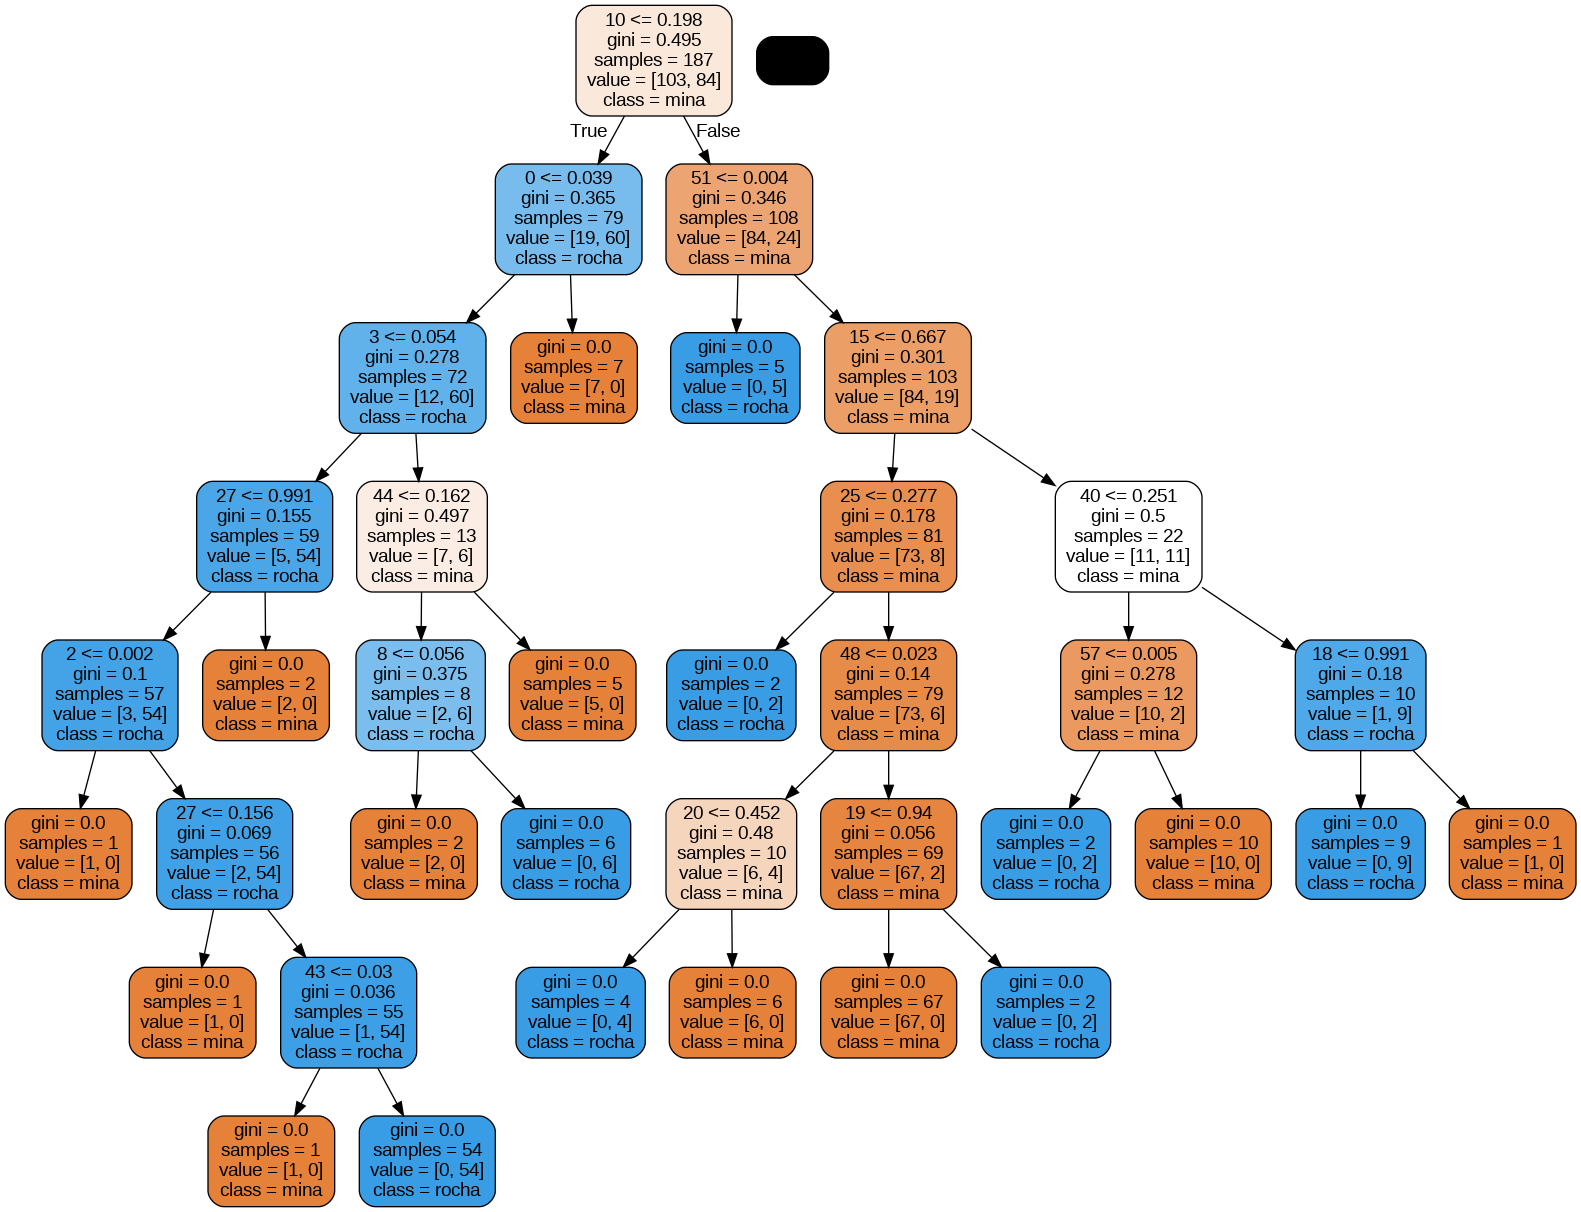

In [ ]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(sonar_tree, out_file=None,
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,60),
                                class_names=["mina", "rocha"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


# Ajuste de hiperparâmetros utilizando grid search e random search

In [ ]:
sonar_tree

DecisionTreeClassifier(random_state=0)

In [ ]:
# Parametros da atuais
sonar_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Cross Validation (divisão da base de treino em 5... 10 partes)

from time import time

In [ ]:
np.arange(3, 15)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
tree_params = {"max_depth": np.arange(3, 15),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.arange(2, 5),
               "min_samples_leaf": np.arange(2, 5),
               }

tree_params

{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': array([2, 3, 4]),
 'min_samples_leaf': array([2, 3, 4])}

In [ ]:
# Executa randomized search
n_iter_search = 100 # numero de iteracoes/execucoes aleatórias do algoritmo

random_search = RandomizedSearchCV(sonar_tree, # modelo
                                   param_distributions=tree_params, # Parametros que criamos,
                                   n_iter=n_iter_search, # É interessante incrementar esse valor para que mais permutações sejam testadas
                                   cv=5,  # Cross Validation - Validação Cruzada
                                   random_state=0)

# |1     | 2| -> Split comum 80%/20%

# |1|2|3|4|5| -> Validação Cruzada ou Cross Validation

In [ ]:
start = time()

random_search.fit(X_train, y_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings \n\n" % ((time() - start), n_iter_search))



RandomizedSearchCV took 6.76 seconds for 100 candidates parameter settings 




In [ ]:
# random_search.cv_results_

In [ ]:
random_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 5,
 'criterion': 'gini'}

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       random_state=0)

In [ ]:
sonar_tree

DecisionTreeClassifier(random_state=0)

In [ ]:
modelo_top_demais_da_conta = random_search.best_estimator_

In [ ]:
print("Acurácia de treinamento:", round(modelo_top_demais_da_conta.score(X_train, y_train),2))

y_pred = random_search.best_estimator_.predict(X_test)
print("Acurácia de previsão:", round(accuracy_score(y_test, y_pred),2))

Acurácia de treinamento: 0.95
Acurácia de previsão: 0.9


In [ ]:
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Mina", "Rocha"], columns=["Mina (prev)", "Rocha (prev)"])
print(cnf_table)

              precision    recall  f1-score   support

        Mina       0.88      0.88      0.88         8
       Rocha       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

       Mina (prev)  Rocha (prev)
Mina             7             1
Rocha            1            12
